In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import seaborn as sns
import os 
from dotenv import load_dotenv

%matplotlib inline

In [2]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_api_key)


str

In [4]:
energy_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')

financials_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

materials_df = api.alpha_vantage.historic_quotes('XLB', adjusted=True, output_format='pandas')

technology_df = api.alpha_vantage.historic_quotes('XLK', adjusted=True, output_format='pandas')

In [6]:
health_df = api.alpha_vantage.historic_quotes('XLV', adjusted=True, output_format='pandas')

industrial_df = api.alpha_vantage.historic_quotes('XLI', adjusted=True, output_format='pandas')

utilities_df = api.alpha_vantage.historic_quotes('XLU', adjusted=True, output_format='pandas')

In [7]:
real_estate_df = api.alpha_vantage.historic_quotes('RWR', adjusted=True, output_format='pandas')


cons_disc_df = api.alpha_vantage.historic_quotes('XLY', adjusted=True, output_format='pandas')



In [8]:

cons_staples_df = api.alpha_vantage.historic_quotes('XLP', adjusted=True, output_format='pandas')

transports_df = api.alpha_vantage.historic_quotes('IYT', adjusted=True, output_format='pandas')

# ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
spy_df = api.alpha_vantage.historic_quotes('SPY', adjusted=True, output_format='pandas')


In [9]:
#DATA CLEANUP

#Select the one column we need,  "adjusted close", and drop the others

materials_df = materials_df['5. adjusted close']
materials_df.head()

technology_df = technology_df['5. adjusted close']
technology_df.head()

real_estate_df = real_estate_df['5. adjusted close']
real_estate_df.head()

cons_disc_df = cons_disc_df['5. adjusted close']
cons_disc_df.head()

cons_staples_df = cons_staples_df['5. adjusted close']
cons_staples_df.head()

energy_df = energy_df['5. adjusted close']
energy_df.head()

financials_df = financials_df['5. adjusted close']
financials_df.head()

health_df = health_df['5. adjusted close']
health_df.head()

industrial_df = industrial_df['5. adjusted close']
industrial_df.head()

utilities_df = utilities_df['5. adjusted close']
utilities_df.head()

transports_df = transports_df['5. adjusted close']
transports_df.head()

spy_df = spy_df['5. adjusted close']
spy_df.head()


#Use concat to put the data in one dataframe
concat_df = pd.concat([materials_df, technology_df, real_estate_df, cons_disc_df, 
                       cons_staples_df, energy_df, financials_df, health_df, industrial_df, 
                       utilities_df, transports_df, spy_df], 
                      axis = "columns", join = "inner")
concat_df.head()


,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close,5. adjusted close
date,,,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88,144.775,282.79
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26,149.920,290.48
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61,154.400,293.21
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15,150.270,285.73
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93,148.900,287.05


In [11]:
#Change column names to avoid confusion
columns = ['Materials close',
          'Tech close',
          'RE close',
          'Discretionary close',
          'Staples close',
          'Energy close',
          'Fin close',
          'HealthCare close',
          'Industrials close',
          'Utilities close',
          'Transports close',
          'S&P 500 Close']
concat_df.columns = columns
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2020-05-01,50.79,88.90,75.11,112.24,57.62,35.85,22.06,97.83,62.27,55.88,144.775,282.79
2020-04-30,51.88,91.41,77.87,116.60,58.26,38.00,22.79,99.73,64.21,57.26,149.920,290.48
2020-04-29,53.47,91.82,79.10,117.33,58.96,38.86,23.38,100.19,65.51,58.61,154.400,293.21
2020-04-28,52.14,88.20,77.38,114.80,59.21,36.18,22.72,99.53,64.28,59.15,150.270,285.73
2020-04-27,51.19,89.39,76.08,114.35,58.88,35.37,22.48,101.58,63.10,58.93,148.900,287.05


In [12]:
#Sort earliest to latest so that .pct_change() function works right.

concat_df.sort_index(inplace=True, ascending=True)
concat_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2003-10-10,15.6663,15.2225,24.9652,23.4176,13.9255,16.9139,15.2858,21.2388,17.2546,12.1628,42.1221,75.1311
2003-10-13,15.8310,15.2692,25.0908,23.6569,13.9785,16.9818,15.5271,21.2993,17.3261,12.2403,42.7774,75.3682
2003-10-14,15.9340,15.2303,25.1083,23.7845,14.0515,16.9139,15.6190,21.3296,17.4118,12.2735,43.0097,75.6341
2003-10-15,15.9203,15.3238,25.0088,23.6888,14.0316,16.6694,15.5788,21.2842,17.4404,12.1186,42.6696,75.4329
2003-10-16,15.9752,15.3783,25.1222,23.7925,14.0515,16.8460,15.5960,21.3977,17.4476,12.1739,42.8023,75.7346


In [13]:
returns_df = concat_df.pct_change()
returns_df

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2003-10-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557,0.003156
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430,0.003528
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908,-0.002660
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110,0.004000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,0.026675,0.008575,0.038635,0.018708,0.002896,0.021664,0.034039,0.012863,0.024850,0.010460,0.028528,0.014418
2020-04-28,0.018558,-0.013312,0.017087,0.003935,0.005605,0.022901,0.010676,-0.020181,0.018700,0.003733,0.009201,-0.004599
2020-04-29,0.025508,0.041043,0.022228,0.022038,-0.004222,0.074074,0.029049,0.006631,0.019135,-0.009129,0.027484,0.026179


In [14]:
# Drop nulls
returns_df.dropna(inplace=True)

#count nulls again
returns_df.isnull().sum()

Materials close        0
Tech close             0
RE close               0
Discretionary close    0
Staples close          0
Energy close           0
Fin close              0
HealthCare close       0
Industrials close      0
Utilities close        0
Transports close       0
S&P 500 Close          0
dtype: int64

In [15]:
# Checking for duplicate rows
returns_df.duplicated()

date
2003-10-13    False
2003-10-14    False
2003-10-15    False
2003-10-16    False
2003-10-17    False
              ...  
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
2020-05-01    False
Length: 4167, dtype: bool

In [16]:
# drop duplicates
returns_df.drop_duplicates(inplace=True)
returns_df.head()

,Materials close,Tech close,RE close,Discretionary close,Staples close,Energy close,Fin close,HealthCare close,Industrials close,Utilities close,Transports close,S&P 500 Close
date,,,,,,,,,,,,
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557,0.003156
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430,0.003528
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908,-0.002660
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110,0.004000
2003-10-17,-0.009452,-0.016211,-0.007846,-0.014080,-0.006135,-0.006856,-0.008836,-0.011319,-0.006964,-0.006366,-0.004458,-0.010909


In [44]:
# rename columns to create dataframe for daily returns
returns_df.rename(columns={'Materials close': 'Materials return',
                          'Tech close': 'Tech return',
                          'RE close': 'RE return',
                          'Discretionary close': 'Discretionary return',
                          'Staples close': 'Staples return',
                          'Energy close': 'Energy return',
                          'Fin close': 'Fin return',
                          'HealthCare close': 'HealthCare return',
                          'Industrials close': 'Industrials return',
                          'Utilities close': 'Utilities return',
                          'Transports close': 'Transports return',
                          'S&P 500 Close': 'S&P 500 return'},
                  inplace=True)
returns_df.head()

,Materials return,Tech return,RE return,Discretionary return,Staples return,Energy return,Fin return,HealthCare return,Industrials return,Utilities return,Transports return,S&P return
date,,,,,,,,,,,,
2003-10-13,0.010513,0.003068,0.005031,0.010219,0.003806,0.004014,0.015786,0.002849,0.004144,0.006372,0.015557,0.003156
2003-10-14,0.006506,-0.002548,0.000697,0.005394,0.005222,-0.003998,0.005919,0.001423,0.004946,0.002712,0.005430,0.003528
2003-10-15,-0.000860,0.006139,-0.003963,-0.004024,-0.001416,-0.014456,-0.002574,-0.002128,0.001643,-0.012621,-0.007908,-0.002660
2003-10-16,0.003448,0.003557,0.004534,0.004378,0.001418,0.010594,0.001104,0.005333,0.000413,0.004563,0.003110,0.004000
2003-10-17,-0.009452,-0.016211,-0.007846,-0.014080,-0.006135,-0.006856,-0.008836,-0.011319,-0.006964,-0.006366,-0.004458,-0.010909


In [45]:
# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns_materials = (1 + returns_df['Materials return']).cumprod()
cumulative_returns_tech = (1 + returns_df['Tech return']).cumprod()
cumulative_returns_RE = (1 + returns_df['RE return']).cumprod()
cumulative_returns_Discretionary = (1 + returns_df['Discretionary return']).cumprod()
cumulative_returns_Staples = (1 + returns_df['Staples return']).cumprod()
cumulative_returns_Energy = (1 + returns_df['Energy return']).cumprod()
cumulative_returns_Fin = (1 + returns_df['Fin return']).cumprod()
cumulative_returns_HealthCare = (1 + returns_df['HealthCare return']).cumprod()
cumulative_returns_Industrials = (1 + returns_df['Industrials return']).cumprod()
cumulative_returns_Utilities = (1 + returns_df['Utilities return']).cumprod()
cumulative_returns_Transports = (1 + returns_df['Transports return']).cumprod()

In [46]:
cumulative_returns_materials

date
2003-10-13    1.010513
2003-10-14    1.017088
2003-10-15    1.016213
2003-10-16    1.019717
2003-10-17    1.010079
                ...   
2020-04-27    3.267523
2020-04-28    3.328163
2020-04-29    3.413059
2020-04-30    3.311567
2020-05-01    3.241991
Name: Materials return, Length: 4167, dtype: float64

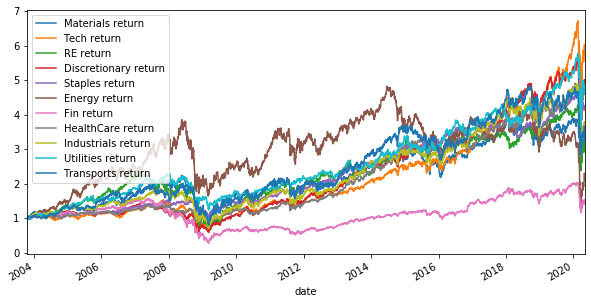

In [47]:
#plot cumulative returns

cumulative_returns_materials.plot(figsize=(10,5), legend=True)
cumulative_returns_tech.plot(figsize=(10,5), legend=True)
cumulative_returns_RE.plot(figsize=(10,5), legend=True)
cumulative_returns_Discretionary.plot(figsize=(10,5), legend=True)
cumulative_returns_Staples.plot(figsize=(10,5), legend=True)
cumulative_returns_Energy.plot(figsize=(10,5), legend=True)
cumulative_returns_Fin.plot(figsize=(10,5), legend=True)
cumulative_returns_HealthCare.plot(figsize=(10,5), legend=True)
cumulative_returns_Industrials.plot(figsize=(10,5), legend=True)
cumulative_returns_Utilities.plot(figsize=(10,5), legend=True)
cumulative_returns_Transports.plot(figsize=(10,5), legend=True)

In [48]:
# Calculate Standard Deviations for each sector
health_std = returns_df['HealthCare return'].std()
print(f' Healthcare standard deviation is {health_std}')

industrials_std = returns_df['Industrials return'].std()
print(f' Industrials standard deviation is {industrials_std}')

utilities_std = returns_df['Utilities return'].std()
print(f' Utilities standard deviation is {utilities_std}')

materials_std = returns_df['Materials return'].std()
print(f' Materials standard deviation is {materials_std}')

tech_std = returns_df['Tech return'].std()
print(f' Technology standard deviation is {tech_std}')

real_estate_std = returns_df['RE return'].std()
print(f' Real estate standard deviation is {real_estate_std}')

cons_disc_std = returns_df['Discretionary return'].std()
print(f' Consumer Discretionary standard deviation is {cons_disc_std}')

staples_std = returns_df['Staples return'].std()
print(f' Staples standard deviation is {staples_std}')

energy_std = returns_df['Energy return'].std()
print(f' Energy standard deviation is {energy_std}')

financials_std = returns_df['Fin return'].std()
print(f' Financials standard deviation is {financials_std}')

transports_std = returns_df['Transports return'].std()
print(f' Transports standard deviation is {transports_std}')









# SP500_std = returns_df['SP500_return'].std()
# print(f' S&P 500 standard deviation is {SP500_std}')

# Identify the sector with highest standard deviation (riskiest)
sectors = [health_std, industrials_std, utilities_std, materials_std, tech_std,
           real_estate_std, cons_disc_std, staples_std, energy_std, financials_std, transports_std ]
sectors.sort()
print(sectors)

 Healthcare standard deviation is 0.010990536854688808
 Industrials standard deviation is 0.013337363855978265
 Utilities standard deviation is 0.011814651629996162
 Materials standard deviation is 0.014985524229934601
 Technology standard deviation is 0.013325845448843401
 Real estate standard deviation is 0.019783194308093773
 Consumer Discretionary standard deviation is 0.013239538765127708
 Staples standard deviation is 0.009071747186554168
 Energy standard deviation is 0.018457212148046038
 Financials standard deviation is 0.019255131918076252
 Transports standard deviation is 0.01522068566054936
[0.009071747186554168, 0.010990536854688808, 0.011814651629996162, 0.013239538765127708, 0.013325845448843401, 0.013337363855978265, 0.014985524229934601, 0.01522068566054936, 0.018457212148046038, 0.019255131918076252, 0.019783194308093773]


In [49]:
# Calculate the annualized standard deviation (252 trading days) for each sector
annual_HealthCare_std = health_std * np.sqrt(252)
annual_HealthCare_std

annual_Industrials_std = industrials_std * np.sqrt(252)
annual_Industrials_std

annual_Utilities_std = utilities_std * np.sqrt(252)
annual_Utilities_std

annual_Materials_std = materials_std * np.sqrt(252)
annual_Materials_std

annual_Tech_std = tech_std * np.sqrt(252)
annual_Tech_std

annual_RE_std = real_estate_std * np.sqrt(252)
annual_RE_std

annual_Discretionary_std = cons_disc_std * np.sqrt(252)
annual_Discretionary_std

annual_Staples_std = staples_std * np.sqrt(252)
annual_Staples_std

annual_Energy_std = energy_std * np.sqrt(252)
annual_Energy_std

annual_FIN_std = financials_std * np.sqrt(252)
annual_FIN_std

annual_Transports_std = transports_std * np.sqrt(252)
annual_Transports_std

# annual_SP500_std = SP500_std * np.sqrt(252)
# annual_HealthCare_std

0.2416208942502029

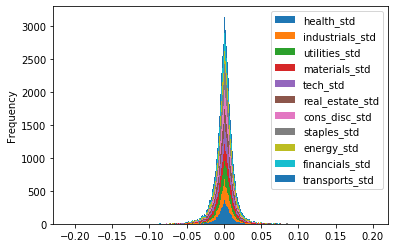

In [50]:
#Plot

sectors_std = pd.DataFrame({
    "health_std": returns_df['HealthCare return'],
    "industrials_std": returns_df['Industrials return'],
    "utilities_std": returns_df['Utilities return'],
    "materials_std": returns_df['Materials return'],
    "tech_std": returns_df['Tech return'],
    "real_estate_std": returns_df['RE return'],
    "cons_disc_std": returns_df['Discretionary return'],
    "staples_std": returns_df['Staples return'],
    "energy_std": returns_df['Energy return'],
    "financials_std": returns_df['Fin return'],
    "transports_std": returns_df['Transports return'],
})

sectors_std.plot.hist(stacked=True, bins=300)

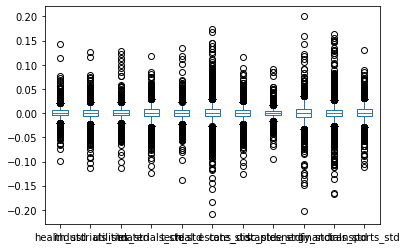

In [51]:
sectors_std.plot.box()

In [52]:

# Calculate Sharpe Ratios for the sectors

HealthCare_sharpe = (returns_df['HealthCare return'].mean() * 252) / (returns_df['HealthCare return'].std() * np.sqrt(252))

Industrials_sharpe = (returns_df['Industrials return'].mean() * 252) / (returns_df['Industrials return'].std() * np.sqrt(252))

Utilities_sharpe = (returns_df['Utilities return'].mean() * 252) / (returns_df['Utilities return'].std() * np.sqrt(252))

Materials_sharpe = (returns_df['Materials return'].mean() * 252) / (returns_df['Materials return'].std() * np.sqrt(252))

Tech_sharpe = (returns_df['Tech return'].mean() * 252) / (returns_df['Tech return'].std() * np.sqrt(252))

RE_sharpe = (returns_df['RE return'].mean() * 252) / (returns_df['RE return'].std() * np.sqrt(252))

Discretionary_sharpe = (returns_df['Discretionary return'].mean() * 252) / (returns_df['Discretionary return'].std() * np.sqrt(252))

Staples_sharpe = (returns_df['Staples return'].mean() * 252) / (returns_df['Staples return'].std() * np.sqrt(252))

Energy_sharpe = (returns_df['Energy return'].mean() * 252) / (returns_df['Energy return'].std() * np.sqrt(252))

Financials_sharpe = (returns_df['Fin return'].mean() * 252) / (returns_df['Fin return'].std() * np.sqrt(252))

Transports_sharpe = (returns_df['Transports return'].mean() * 252) / (returns_df['Transports return'].std() * np.sqrt(252))

print(f" HealthCare: {HealthCare_sharpe},Industrials: {Industrials_sharpe},Utilities:{Utilities_sharpe},Materials: {Materials_sharpe},Technology: {Tech_sharpe},Real Estate: {RE_sharpe},Consumer Discretionary: {Discretionary_sharpe},Consumer Staples: {Staples_sharpe},Energy: {Energy_sharpe},Financials: {Financials_sharpe},Transports: {Transports_sharpe}")

 HealthCare: 0.6165140088775338,Industrials: 0.4727900273760369,Utilities:0.5852809487113092,Materials: 0.4185740854610443,Technology: 0.6103701956375294,Real Estate: 0.3698789877808839,Consumer Discretionary: 0.5564261985437952,Consumer Staples: 0.6684488337743945,Energy: 0.30253731398949213,Financials: 0.22520511001132418,Transports: 0.43017610112073096


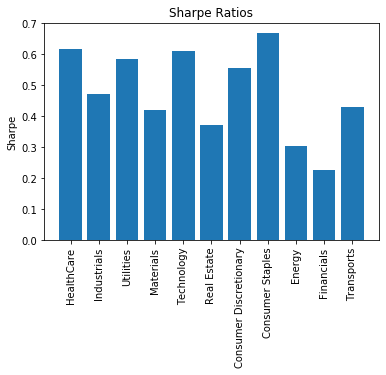

In [53]:
#Plot the sharpe ratios

objects = ('HealthCare',
           'Industrials',
           'Utilities',
           'Materials',
           'Technology',
           'Real Estate',
           'Consumer Discretionary',
           'Consumer Staples',
          'Energy',
          'Financials',
          'Transports')
y_pos = np.arange(len(objects))
sharpe = [HealthCare_sharpe,
          Industrials_sharpe,
          Utilities_sharpe,
          Materials_sharpe,
         Tech_sharpe,
         RE_sharpe,
         Discretionary_sharpe,
         Staples_sharpe,
         Energy_sharpe,
         Financials_sharpe,
         Transports_sharpe]

plt.bar(y_pos, sharpe, align='center')
plt.xticks(y_pos, objects, rotation=90)
plt.ylabel('Sharpe')
plt.title('Sharpe Ratios')

plt.show()

In [54]:
# Drop nulls on Returns
returns_df.dropna(inplace=True)

#count nulls 
returns_df.isnull().sum()

Materials return        0
Tech return             0
RE return               0
Discretionary return    0
Staples return          0
Energy return           0
Fin return              0
HealthCare return       0
Industrials return      0
Utilities return        0
Transports return       0
S&P return              0
dtype: int64

In [55]:
#Check correlation

sector_correlation = returns_df.corr()
sector_correlation

,Materials return,Tech return,RE return,Discretionary return,Staples return,Energy return,Fin return,HealthCare return,Industrials return,Utilities return,Transports return,S&P return
Materials return,1.000000,0.761640,0.651843,0.786922,0.642656,0.774966,0.731352,0.667321,0.856311,0.574562,0.793243,0.853319
Tech return,0.761640,1.000000,0.633527,0.842002,0.719271,0.661647,0.730081,0.746081,0.833109,0.594847,0.756555,0.911838
RE return,0.651843,0.633527,1.000000,0.737316,0.598340,0.535559,0.794066,0.554304,0.709150,0.573430,0.672311,0.743505
Discretionary return,0.786922,0.842002,0.737316,1.000000,0.729726,0.652030,0.801526,0.731633,0.870237,0.580467,0.830715,0.902984
Staples return,0.642656,0.719271,0.598340,0.729726,1.000000,0.548903,0.627079,0.746410,0.725204,0.710530,0.650446,0.796936
Energy return,0.774966,0.661647,0.535559,0.652030,0.548903,1.000000,0.623422,0.598086,0.730474,0.579587,0.642275,0.791807
Fin return,0.731352,0.730081,0.794066,0.801526,0.627079,0.623422,1.000000,0.651621,0.807835,0.524662,0.758010,0.860674
HealthCare return,0.667321,0.746081,0.554304,0.731633,0.746410,0.598086,0.651621,1.000000,0.745997,0.619377,0.662768,0.833273
Industrials return,0.856311,0.833109,0.709150,0.870237,0.725204,0.730474,0.807835,0.745997,1.000000,0.609047,0.890903,0.918249
Utilities return,0.574562,0.594847,0.573430,0.580467,0.710530,0.579587,0.524662,0.619377,0.609047,1.000000,0.529738,0.695279


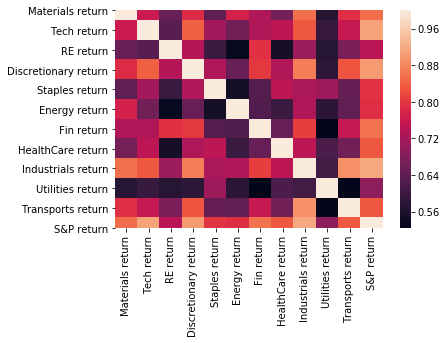

In [56]:
# Heapmap to visualize sector correlation
sns.heatmap(sector_correlation)

In [59]:
#BETA CALCULATION Materials Sector and S&P 500

# Calculate covariance of Materials vs. S&P 500
materials_covariance = returns_df['Materials return'].cov(returns_df['S&P return'])
materials_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Materials Sector
Materials_beta = materials_covariance / variance
Materials_beta

1.061332614618054

In [60]:
#BETA CALCULATION Technology Sector and S&P 500

# Calculate covariance of Tech vs. S&P 500
tech_covariance = returns_df['Tech return'].cov(returns_df['S&P return'])
tech_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Technology Sector
Tech_beta = tech_covariance / variance
Tech_beta

1.0085105577848397

In [61]:
#BETA CALCULATION Real Estate Sector and S&P 500

# Calculate covariance of RE vs. S&P 500
RE_covariance = returns_df['RE return'].cov(returns_df['S&P return'])
RE_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Real Estate Sector
RE_beta = materials_covariance / variance
RE_beta

1.061332614618054

In [62]:
#BETA CALCULATION Consumer Discretionary Sector and S&P 500

# Calculate covariance of Consumer Discretionary vs. S&P 500
Discretionary_covariance = returns_df['Discretionary return'].cov(returns_df['S&P return'])
Discretionary_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Consumer Discretionary Sector
Discretionary_beta = Discretionary_covariance / variance
Discretionary_beta

0.9922489242741143

In [63]:
#BETA CALCULATION Consumer Staples Sector and S&P 500

# Calculate covariance of Healthcare vs. S&P 500
Staples_covariance = returns_df['Staples return'].cov(returns_df['S&P return'])
Discretionary_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Consumer Staples Sector
Staples_beta = Staples_covariance / variance
Staples_beta

0.6000430053758643

In [64]:
#BETA CALCULATION Energy Sector and S&P 500

# Calculate covariance of Energy vs. S&P 500
Energy_covariance = returns_df['Energy return'].cov(returns_df['S&P return'])
Energy_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Energy Sector
Energy_beta = Energy_covariance / variance
Energy_beta

1.212979872036041

In [65]:
#BETA CALCULATION Financials Sector and S&P 500

# Calculate covariance of Healthcare vs. S&P 500
Financials_covariance = returns_df['Fin return'].cov(returns_df['S&P return'])
Financials_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Healthcare Sector
Financials_beta = Financials_covariance / variance
Financials_beta

1.3754757802945523

In [66]:
#BETA CALCULATION Consumer HealthCare Sector and S&P 500

# Calculate covariance of Healthcare vs. S&P 500
HealthCare_covariance = returns_df['HealthCare return'].cov(returns_df['S&P return'])
HealthCare_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Healthcare Sector
HealthCare_beta = HealthCare_covariance / variance
HealthCare_beta

0.7601059191306926

In [67]:
#BETA CALCULATION Industrials Sector and S&P 500

# Calculate covariance of Industrials vs. S&P 500
Industrials_covariance = returns_df['Industrials return'].cov(returns_df['S&P return'])
Industrials_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Industrials Sector
Industrials_beta = Industrials_covariance / variance
Industrials_beta

1.016479499723216

In [69]:
#BETA CALCULATION Utilities Sector and S&P 500

# Calculate covariance of Utilities vs. S&P 500
Utilities_covariance = returns_df['Utilities return'].cov(returns_df['S&P return'])
Utilities_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Utilities Sector
Utilities_beta = Utilities_covariance / variance
Utilities_beta

0.6817858526035526

In [77]:
#BETA CALCULATION Transports Sector and S&P 500

# Calculate covariance of Transports vs. S&P 500
Transports_covariance = returns_df['Transports return'].cov(returns_df['S&P return'])
Transports_covariance

# Calculate variance of S&P 500 returns
variance = returns_df['S&P return'].var()
variance

# Calculate beta of Transports Sector
Transports_beta = Transports_covariance / variance
Transports_beta

1.054374733784144

A 10,000 investment in the Materials Sector would have increased to 32419.90769996753


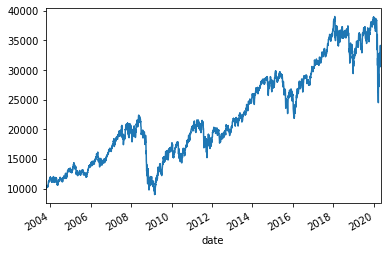

In [78]:
# Plot the monetary returns of Materials Sector 
initial_investment = 10000
cumulative_profit_materials = initial_investment * cumulative_returns_materials
print(f'A 10,000 investment in the Materials Sector would have increased to {cumulative_profit_materials[-1]}')
cumulative_profit_materials.plot()

A 10,000 investment in the Technology Sector would have increased to 58400.39415339094


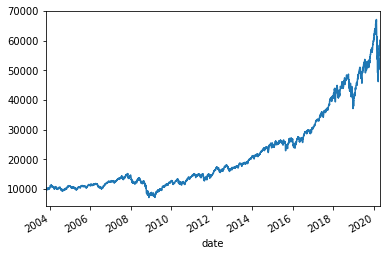

In [79]:
# Plot the monetary returns of Tech Sector 
initial_investment = 10000
cumulative_profit_tech = initial_investment * cumulative_returns_tech
print(f'A 10,000 investment in the Technology Sector would have increased to {cumulative_profit_tech[-1]}')
cumulative_profit_tech.plot()

A 10,000 investment in the Real Estate Sector would have increased to 30085.879544325584


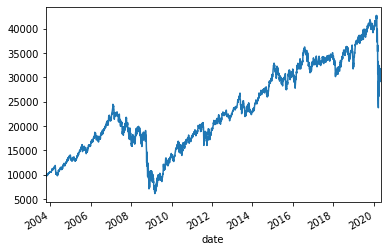

In [80]:
# Plot the monetary returns of Real Estate Sector 
initial_investment = 10000
cumulative_profit_RE = initial_investment * cumulative_returns_RE
print(f'A 10,000 investment in the Real Estate Sector would have increased to {cumulative_profit_RE[-1]}')
cumulative_profit_RE.plot()

A 10,000 investment in the Consumer Discretionary Sector would have increased to 47929.76223011727


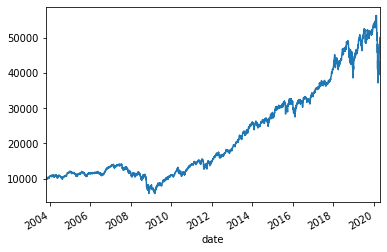

In [81]:
# Plot the monetary returns of Consumer Discretionary Sector 
initial_investment = 10000
cumulative_profit_Discretionary = initial_investment * cumulative_returns_Discretionary
print(f'A 10,000 investment in the Consumer Discretionary Sector would have increased to {cumulative_profit_Discretionary[-1]}')
cumulative_profit_Discretionary.plot()

A 10,000 investment in the Consumer Staples Sector would have increased to 41377.32935980735


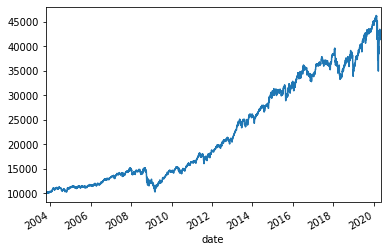

In [82]:
# Plot the monetary returns of Consumer Staples Sector 
initial_investment = 10000
cumulative_profit_Staples = initial_investment * cumulative_returns_Staples
print(f'A 10,000 investment in the Consumer Staples Sector would have increased to {cumulative_profit_Staples[-1]}')
cumulative_profit_Staples.plot()

A 10,000 investment in the Energy Sector would have increased to 21195.58469661045


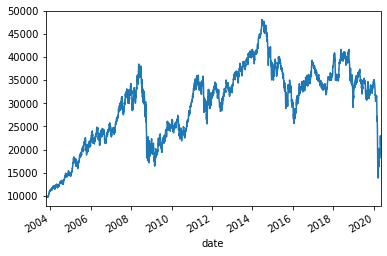

In [83]:
# Plot the monetary returns of Energy Sector 
initial_investment = 10000
cumulative_profit_Energy = initial_investment * cumulative_returns_Energy
print(f'A 10,000 investment in the Energy Sector would have increased to {cumulative_profit_Energy[-1]}')
cumulative_profit_Energy.plot()

A 10,000 investment in the Financials Sector would have increased to 14431.694775543247


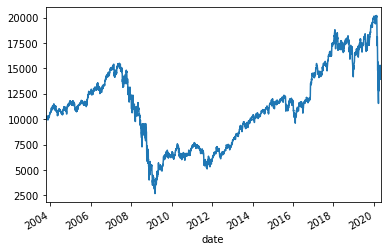

In [84]:
# Plot the monetary returns of Financial Sector 
initial_investment = 10000
cumulative_profit_Fin = initial_investment * cumulative_returns_Fin
print(f'A 10,000 investment in the Financials Sector would have increased to {cumulative_profit_Fin[-1]}')
cumulative_profit_Fin.plot()

A 10,000 investment in the Healthcare Sector would have increased to 46061.92440250844


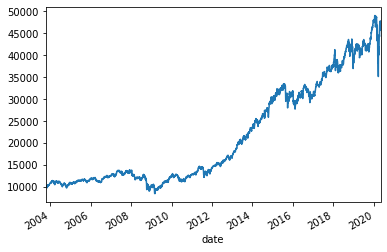

In [86]:
# Plot the monetary returns of HealthCare Sector 
initial_investment = 10000
cumulative_profit_health = initial_investment * cumulative_returns_HealthCare
print(f'A 10,000 investment in the Healthcare Sector would have increased to {cumulative_profit_health[-1]}')
cumulative_profit_health.plot()

A 10,000 investment in the Industrial Sector would have grown to 36088.92701076814


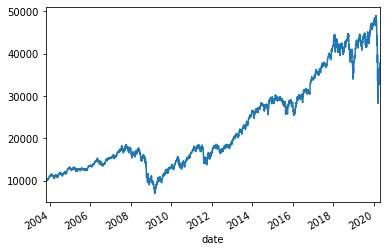

In [90]:
# Plot the monetary returns of Industrial Sector 
initial_investment = 10000
cumulative_profit_industrial = initial_investment * cumulative_returns_Industrials
print(f'A 10,000 investment in the Industrial Sector would have grown to {cumulative_profit_industrial[-1]}')
cumulative_profit_industrial.plot()

A 10,000 investment in the Utilities Sector would have grown to 45943.36830335114


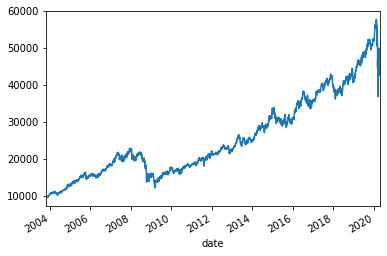

In [91]:
# Plot the monetary returns of Utilities Sector 
initial_investment = 10000
cumulative_profit_utilities = initial_investment * cumulative_returns_Utilities
print(f'A 10,000 investment in the Utilities Sector would have grown to {cumulative_profit_utilities[-1]}')
cumulative_profit_utilities.plot()

A 10,000 investment in the Transports Sector would have grown to 34370.31866882226


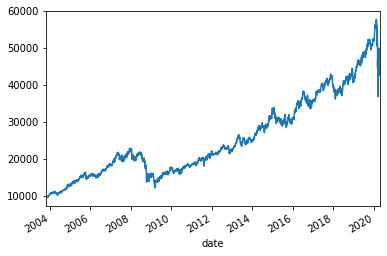

In [92]:
# Plot the monetary returns of Transport Sector 
initial_investment = 10000
cumulative_profit_transports = initial_investment * cumulative_returns_Transports
print(f'A 10,000 investment in the Transports Sector would have grown to {cumulative_profit_transports[-1]}')
cumulative_profit_utilities.plot()